# Building a mask-face classification model using MobileNet without retrain

This notebook would build, train, and evaluate a model using `transfer learning` with MobileNet for masked faces classification.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large

print("\u2022 Using TensorFlow Version:", tf.__version__)
print('\u2022 GPU Device Found.' if tf.config.list_physical_devices('GPU') else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.4.1
• GPU Device Found.


In [ ]:
DATASET_DIR = '/content/drive/MyDrive/capstone_machine_learning/capstone_dataset/arranged_dataset' # Change based on dataset dir on your system/device
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
VAL_DIR = os.path.join(DATASET_DIR, 'validation')
TEST_DIR = os.path.join(DATASET_DIR, 'test')
BATCH_SIZE = 128

## Load images using ImageDataGenerator

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized
        batch_size=BATCH_SIZE,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
        VAL_DIR,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 10000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


## Debug dataset generators

In [ ]:
# dir(train_generator) # to know what attributes and methods the generator has

In [ ]:
print('Number of classes:', train_generator.num_classes)
print('Class map:', train_generator.class_indices)
print('Auto-shuffle:', train_generator.shuffle, end='\n\n')

print('Number of classes:', val_generator.num_classes)
print('Class map:', val_generator.class_indices)
print('Auto-shuffle:', val_generator.shuffle, end='\n\n')

print('Number of classes:', test_generator.num_classes)
print('Class map:', test_generator.class_indices)
print('Auto-shuffle:', test_generator.shuffle, end='\n\n')

Number of classes: 5
Class map: {'correctly_masked': 0, 'no_mask': 1, 'uncovered_chin': 2, 'uncovered_nose': 3, 'uncovered_nose_and_mouth': 4}
Auto-shuffle: True

Number of classes: 5
Class map: {'correctly_masked': 0, 'no_mask': 1, 'uncovered_chin': 2, 'uncovered_nose': 3, 'uncovered_nose_and_mouth': 4}
Auto-shuffle: True

Number of classes: 5
Class map: {'correctly_masked': 0, 'no_mask': 1, 'uncovered_chin': 2, 'uncovered_nose': 3, 'uncovered_nose_and_mouth': 4}
Auto-shuffle: True



Train samples
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


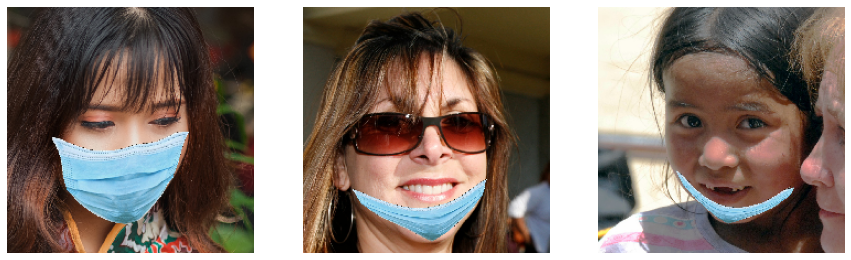

Validation samples
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


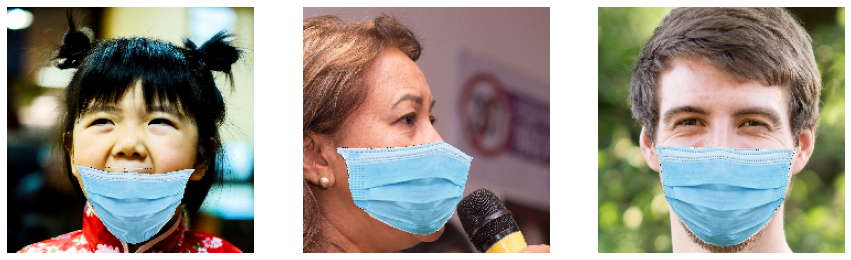

Test samples
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


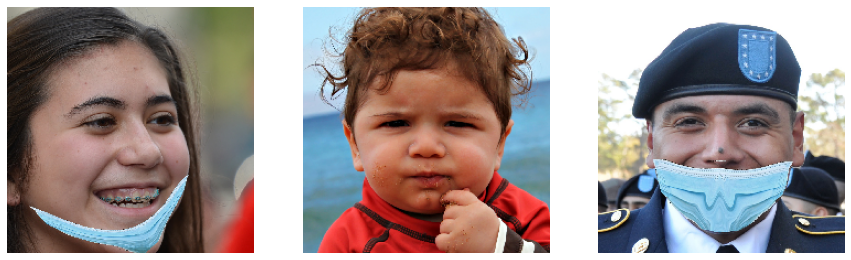

In [ ]:
# Sample some images in data generator to display

def display_samples(generator):
  '''
  Source: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
  '''
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
  for i in range(3):

    image = next(generator)[0][0]
    print(image.shape)

    ax[i].imshow(image)
    ax[i].axis('off')
  fig.show()
  plt.show()

print('Train samples')
display_samples(train_generator)
print('Validation samples')
display_samples(val_generator)
print('Test samples')
display_samples(test_generator)

## Build Model with MobileNet V3 Large

In [ ]:
NUM_CLASSES = train_generator.num_classes

In [63]:
mobilenet = MobileNetV3Large(input_shape=(224,224,3), include_top=False)

last_output = mobilenet.output
last_output = tf.keras.layers.GlobalAveragePooling2D()(last_output)
# last_output = tf.keras.layers.Dense(1024, activation='relu')(last_output)
# last_output = tf.keras.layers.Dense(1024, activation='relu')(last_output)
# last_output = tf.keras.layers.Dense(512, activation='relu')(last_output)
last_output = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(last_output)

model=tf.keras.models.Model(inputs=mobilenet.input, outputs=last_output)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_8 (Rescaling)         (None, 224, 224, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_8[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [64]:
# Freeze MobileNet layers
mobilenet.trainable = False

In [65]:
# Iterate per layer to check trainability
is_trainables = []
for layer in model.layers:
  is_trainables.append(layer.trainable)
print(is_trainables)
print([x for x in is_trainables if x])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [66]:
print("Weights:", len(model.weights))
print("Trainable weights:", len(model.trainable_weights))
print("Non trainable weights:", len(model.non_trainable_weights))

Weights: 266
Trainable weights: 2
Non trainable weights: 264


In [67]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
steps_train = train_generator.n//BATCH_SIZE
steps_val = test_generator.n//BATCH_SIZE

history = model.fit(train_generator,
          steps_per_epoch=steps_train,
          validation_data=test_generator,
          validation_steps=steps_val,
          epochs=10,
          verbose=1)

Epoch 1/10
78/78 [==============================] - 306s 4s/step - loss: 1.6250 - accuracy: 0.2024 - val_loss: 1.6207 - val_accuracy: 0.1984
Epoch 2/10
78/78 [==============================] - 305s 4s/step - loss: 1.6161 - accuracy: 0.2074 - val_loss: 1.6108 - val_accuracy: 0.2073
Epoch 3/10
78/78 [==============================] - 303s 4s/step - loss: 1.6096 - accuracy: 0.2223 - val_loss: 1.6004 - val_accuracy: 0.2359
Epoch 4/10
78/78 [==============================] - 306s 4s/step - loss: 1.6023 - accuracy: 0.2277 - val_loss: 1.5984 - val_accuracy: 0.2297
Epoch 5/10
78/78 [==============================] - 303s 4s/step - loss: 1.6034 - accuracy: 0.2227 - val_loss: 1.6043 - val_accuracy: 0.2120
Epoch 6/10
78/78 [==============================] - 306s 4s/step - loss: 1.6025 - accuracy: 0.2261 - val_loss: 1.6065 - val_accuracy: 0.2276
Epoch 7/10
78/78 [==============================] - 303s 4s/step - loss: 1.6045 - accuracy: 0.2251 - val_loss: 1.5972 - val_accuracy: 0.2234
Epoch 8/10
78

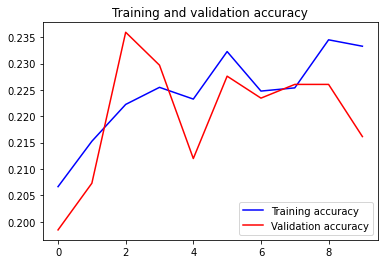

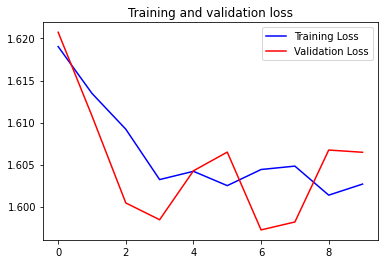

In [74]:
# Plot accuracy of training and 'validation'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [75]:
MODEL_DIR = "/content/drive/MyDrive/capstone_machine_learning/capstone_notebooks/Models"
model.save(os.path.join(MODEL_DIR, 'model_no_retrain_scenario_1'))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/capstone_machine_learning/capstone_notebooks/Models/model_no_retrain_scenario_1/assets
